In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

# To Plot matplotlib figures inline on the notebook
%matplotlib inline

sns.set_style("whitegrid")

In [3]:
raw = np.loadtxt("gestures-dataset/U05/08/01.txt")

In [4]:
test = raw[:,3:6]
len(test)

28

In [125]:
gestdict = {}

In [126]:
x,y,z = test[:,0],test[:,1],test[:,2]
#x,y,z
gestdict['x'] = x
gestdict['y'] = y
gestdict['z'] = z

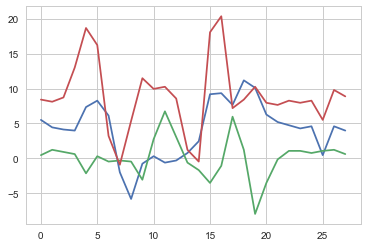

In [127]:
for i in range(3):
    plt.plot(test[:,i])

In [128]:
def dist(xyz):
    return np.sqrt(np.sum(xyz**2))

In [129]:
Macc = np.apply_along_axis(dist,1,test)
gestdict['Macc'] = Macc
#Macc

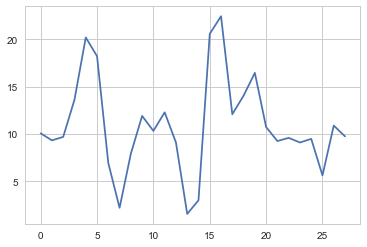

In [130]:
#dist(np.array([1,1,1]))
plt.plot(Macc)

In [131]:
Mjerk = sp.diff(Macc)
gestdict['Mjerk'] = Mjerk
#plt.plot(Mjerk)

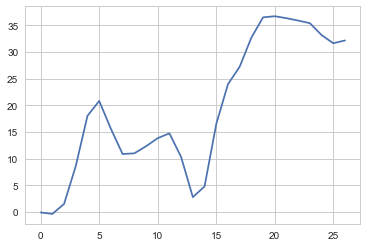

In [132]:
Mvel = sp.integrate.cumtrapz(Macc-9.8)
gestdict['Mvel'] = Mvel
plt.plot(Mvel)

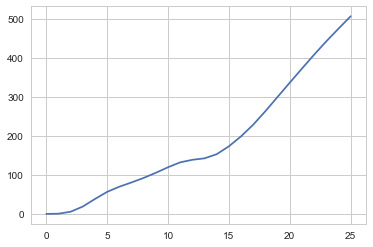

In [133]:
Mdist = sp.integrate.cumtrapz(Mvel)
gestdict['Mdist'] = Mdist
plt.plot(Mdist)

## It would be VERY helpful to subtract a gravity vector.
Try subtracting the inital acceleration (orientation vector) assuming a(t=0)=0 to remove gravity.  Doing this will not correctly represent velocity and relative position **if the subject rotates their hand**!  BUT it will still provide an output which may be distinguishing.

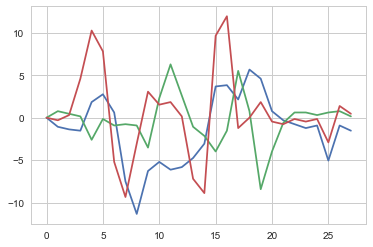

In [134]:
acc=test-test[0]
for i in range(3):
    gestdict['acc_g'+str(i)]= acc[:,i]
    plt.plot(acc[:,i])

In [135]:
jerk = np.apply_along_axis(sp.diff,0,acc)
#jerk

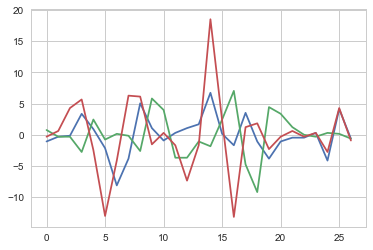

In [136]:
for i in range(3):
    gestdict['jerk'+str(i)]= jerk[:,i]
    plt.plot(jerk[:,i])

In [137]:
vel = np.apply_along_axis(sp.integrate.cumtrapz,0,acc)

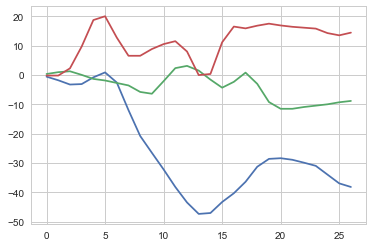

In [138]:
for i in range(3):
    gestdict['vel_g'+str(i)]= vel[:,i]
    plt.plot(vel[:,i])

In [139]:
pos = np.apply_along_axis(sp.integrate.cumtrapz,0,vel)

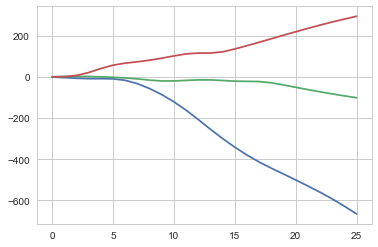

In [140]:
for i in range(3):
    gestdict['pos_g'+str(i)]= pos[:,i]
    plt.plot(pos[:,i])

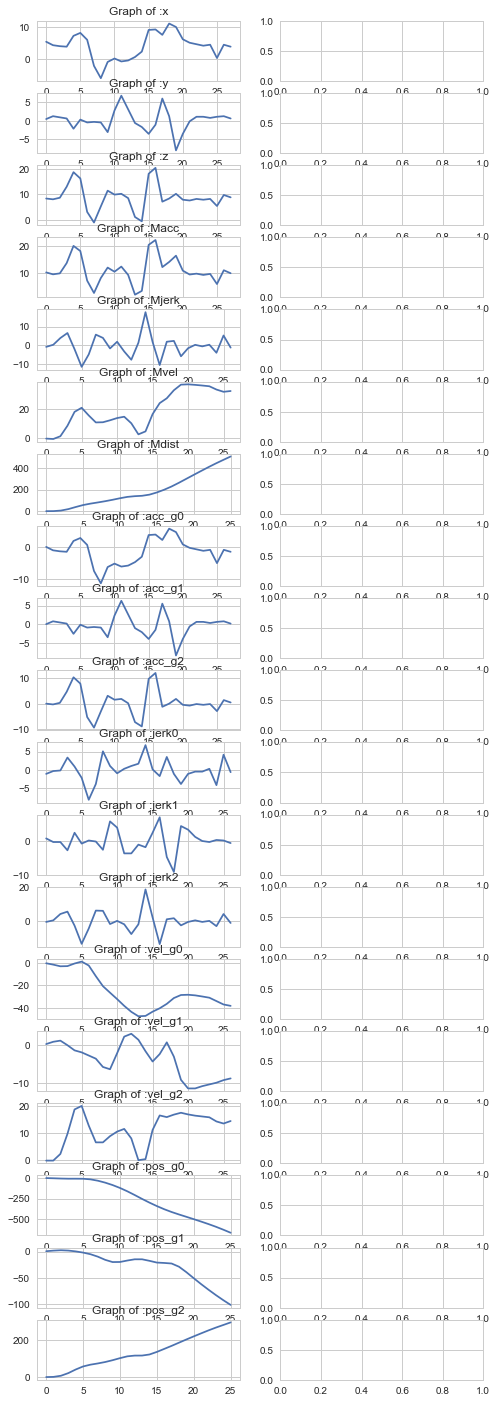

In [141]:
n_plots = len(gestdict.keys())
fig, ax =  plt.subplots(ncols = 2, nrows=n_plots ,figsize=(8, 25))

for i, key in zip(range(n_plots), gestdict.keys()):
    
    ax[i,0].set_title("Graph of :"+key)
    #ax[i].set_ylabel("")
    #ax[i].set_xlabel("time")
    ax[i,0].plot(gestdict[key]);

/Users/dlicht/anaconda/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


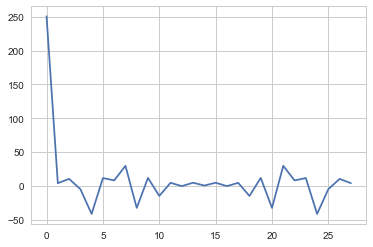

In [142]:
gestdict['fft1']=sp.fft(gestdict['z'])
plt.plot(gestdict['fft1'])

In [143]:
#fourier series experimenting.... ended up moving to Haar Wavelet Transform instead
gestdict['fft1']=sp.fft(gestdict['x'])
l = len(gestdict['x'])
n = int(l/2)
print(l,n)
temp1 = sp.ifft(gestdict['fft1'][l-n:])
temp2 = sp.ifft(gestdict['fft1'][:n])
temp3 = sp.ifft(gestdict['fft1'][(l-n)//2:l-(l-n)//2])
rt = gestdict['fft1']
rt[(l-n)//2:l-(l-n)//2] = 0
#print(rt)
temp4 = sp.ifft(rt)

gestdict['fft1']=sp.fft(gestdict['x'])
rt = gestdict['fft1']
rt[:n//2] = 0
rt[-n//2:] = 0
#print(rt)
temp5 = sp.ifft(rt)

28 14


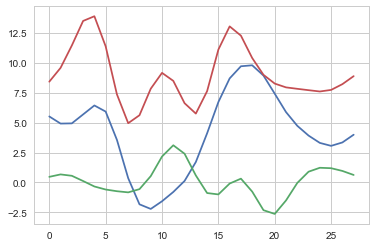

In [146]:
import scipy.signal as signal
 
# First, design the Buterworth filter
N  = 2    # Filter order
Wn = 0.3 # Cutoff frequency
B, A = signal.butter(N, Wn, output='ba')
# Second, apply the filter
tempfx = signal.filtfilt(B,A, gestdict['x'])
tempfy = signal.filtfilt(B,A, gestdict['y'])
tempfz = signal.filtfilt(B,A, gestdict['z'])

#plt.plot(temp1)
#plt.plot(temp2)
#plt.plot(gestdict['x'])
#plt.plot(gestdict['y'])
#plt.plot(gestdict['z'])
#plt.plot(temp3)
#plt.plot(temp4)
#plt.plot(temp5)
plt.plot(tempfx)
plt.plot(tempfy)
plt.plot(tempfz)

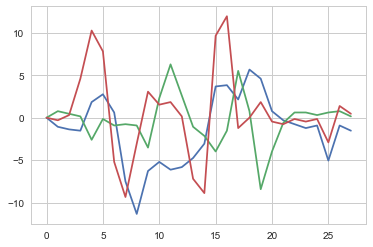

In [145]:
for i in range(3):
    gestdict['acc_g'+str(i)]= acc[:,i]
    plt.plot(acc[:,i])

In [121]:
def turningpoints(lst):
    dx = np.diff(lst)
    return np.sum(dx[1:] * dx[:-1] < 0)

turningpoints(L)

NameError: name 'L' is not defined

In [58]:
plt.plot(L)

NameError: name 'L' is not defined

In [59]:
def up_turningpoints(lst):
    dx = np.diff(lst)
    inflections = 0
    for i in range(len(dx)-1):
        if dx[i]*dx[i+1] < 0 and dx[i] < dx[i+1]:
            inflections += 1
    return inflections

In [60]:
t = up_turningpoints(L)
print("turning points =",t)

NameError: name 'L' is not defined

In [61]:
def down_turningpoints(lst):
    dx = np.diff(lst)
    inflections = 0
    for i in range(len(dx)-1):
        if dx[i]*dx[i+1] < 0 and dx[i] > dx[i+1]:  #note reversed sign between dx[i] and dx[i+1] compaired to up_turningpoints
            inflections += 1
    return inflections

In [62]:
t = down_turningpoints(L)
print("turning points =",t)

NameError: name 'L' is not defined

In [63]:
Lm = [l - 2 for l in L]
plt.plot(Lm)

NameError: name 'L' is not defined

In [64]:
def zero_crossings(lst):
    crossings = 0
    for i in range(len(lst)-1):
        #print(lst[i])
        if (lst[i] >= 0 and lst[i+1] < 0) or (lst[i] < 0 and lst[i+1] >= 0):
            #print("axis crossed!")
            crossings += 1
    return crossings

In [65]:
def up_zero_crossings(lst):
    crossings = 0
    for i in range(len(lst)-1):
        #print(lst[i])
        if lst[i] <= 0 and lst[i+1] > 0:
            #print("axis crossed!")
            crossings += 1
    return crossings

In [66]:
def down_zero_crossings(lst):
    crossings = 0
    for i in range(len(lst)-1):
        #print(lst[i])
        if lst[i] >= 0 and lst[i+1] < 0:
            #print("axis crossed!")
            crossings += 1
    return crossings

In [67]:
Lm = [l - 4.5 for l in L]
plt.plot(Lm)

NameError: name 'L' is not defined

In [68]:
zero_crossings(Lm),down_zero_crossings(Lm),up_zero_crossings(Lm)

NameError: name 'Lm' is not defined

In [69]:
np.max(Lm)

NameError: name 'Lm' is not defined

In [13]:
a = raw[:,0]-raw[0,0]
a

array([    0.,   111.,   223.,   333.,   446.,   559.,   683.,   772.,
         886.,  1003.,  1101.,  1214.,  1326.,  1431.,  1542.,  1665.,
        1791.,  1881.,  1987.,  2089.,  2216.,  2353.,  2425.,  2547.,
        2646.,  2768.,  2862.,  2985.])

In [14]:
1/0.111

9.00900900900901

In [11]:
b = raw[:,1]-raw[0,1]
b

array([  0.00000000e+00,   1.11145019e+08,   2.23175048e+08,
         3.33221435e+08,   4.45495605e+08,   5.58990478e+08,
         6.83166504e+08,   7.72430420e+08,   8.85955810e+08,
         1.00256348e+09,   1.10107422e+09,   1.21435547e+09,
         1.32614136e+09,   1.43063354e+09,   1.54171753e+09,
         1.66458130e+09,   1.79113770e+09,   1.88064575e+09,
         1.98736572e+09,   2.08908081e+09,   2.21594238e+09,
         2.35324097e+09,   2.42520142e+09,   2.54748535e+09,
         2.64569092e+09,   2.76843262e+09,   2.86169434e+09,
         2.98486328e+09])

In [12]:
c = raw[:,2]-raw[0,2]
c

array([  0.00000000e+00,   1.10000000e+08,   2.20000000e+08,
         3.30000000e+08,   4.40000000e+08,   5.50000000e+08,
         6.60000000e+08,   7.70000000e+08,   8.80000000e+08,
         9.90000000e+08,   1.10000000e+09,   1.21000000e+09,
         1.32000000e+09,   1.43000000e+09,   1.54000000e+09,
         1.65000000e+09,   1.76000000e+09,   1.87000000e+09,
         1.98000000e+09,   2.09000000e+09,   2.20000000e+09,
         2.31000000e+09,   2.42000000e+09,   2.53000000e+09,
         2.64000000e+09,   2.75000000e+09,   2.86000000e+09,
         2.97000000e+09])